In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy import stats


Time Series Penn State [reference](https://online.stat.psu.edu/stat510/).


In [21]:
# 1.2 Federal Reserve Economic Data (FRED) from the St. Louis Federal Reserve
#       
#
#             Returns historical data for any symbol at the website
#               http://research.stlouisfed.org/fred2/
#
# Series name | Description
# 
# DGS3MO      | 3-Month Treasury, constant maturity rate
# DGS1        | 1-Year Treasury, constant maturity rate
# DGS5        | 5-Year Treasury, constant maturity rate
# DGS10       | 10-Year Treasury, constant maturity rate
#
# DAAA        | Moody's Seasoned Aaa Corporate Bond Yield 
# DBAA        | Moody's Seasoned Baa Corporate Bond Yield 
#
# DCOILWTICO  | Crude Oil Prices: West Text Intermediate (WTI) - Cushing, Oklahoma


# Download the data from the fed: 
from pandas_datareader import data, wb

fredList= ['DGS3MO','DGS1','DGS5','DGS10','DAAA','DBAA','DCOILWTICO']
fredData = data.DataReader(fredList,'fred','2000-01-01','2013-05-31')

# Save the data: 

fredData.rename_axis('Date').to_csv('fredRawData.csv')


In [63]:
# Load the Data: 
fred_raw_data = pd.read_csv('fredRawData.csv',parse_dates=['Date']).set_index('Date')

In [65]:
fred_raw_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23',
               '2013-05-24', '2013-05-27', '2013-05-28', '2013-05-29',
               '2013-05-30', '2013-05-31'],
              dtype='datetime64[ns]', name='Date', length=3500, freq=None)

In [23]:
# Data Cleaning: 
fred_raw_data.isna().sum()


DGS3MO        144
DGS1          144
DGS5          144
DGS10         144
DAAA          144
DBAA          144
DCOILWTICO    134
dtype: int64

In [66]:
# Our focus is on DGS10, the yield of constant-maturity 10 Year US bond. Let's create a data set with no missing date from 'DGS10'
fred_clean = fred_raw_data[~fred_raw_data['DGS10'].isna()]
fred_clean

,DGS3MO,DGS1,DGS5,DGS10,DAAA,DBAA,DCOILWTICO
Date,,,,,,,
2000-01-03,5.48,6.09,6.50,6.58,7.75,8.27,NaN
2000-01-04,5.43,6.00,6.40,6.49,7.69,8.21,25.56
2000-01-05,5.44,6.05,6.51,6.62,7.78,8.29,24.65
2000-01-06,5.41,6.03,6.46,6.57,7.72,8.24,24.79
2000-01-07,5.38,6.00,6.42,6.52,7.69,8.22,24.79
...,...,...,...,...,...,...,...
2013-05-24,0.04,0.12,0.90,2.01,3.94,4.76,93.84
2013-05-28,0.05,0.13,1.02,2.15,4.06,4.88,94.65
2013-05-29,0.05,0.14,1.02,2.13,4.04,4.88,93.13


In [68]:
# Count how many missing values are still present:
fred_clean.isna().sum()

DGS3MO         0
DGS1           0
DGS5           0
DGS10          0
DAAA           1
DBAA           1
DCOILWTICO    17
dtype: int64

In [79]:
fred_clean['DGS10']

Date
2000-01-03    6.58
2000-01-04    6.49
2000-01-05    6.62
2000-01-06    6.57
2000-01-07    6.52
              ... 
2013-05-24    2.01
2013-05-28    2.15
2013-05-29    2.13
2013-05-30    2.13
2013-05-31    2.16
Name: DGS10, Length: 3356, dtype: float64

In [104]:
DGS10_daily = fred_clean['DGS10']

In [86]:
fred_clean_Weekly= fred_clean.resample('W-FRI').ohlc()
fred_clean_Monthly = fred_clean.resample('M').ohlc()

In [87]:
DGS10_weekly = fred_clean_Weekly['DGS10']
DGS10_weekly

,open,high,low,close
Date,,,,
2000-01-07,6.58,6.62,6.49,6.52
2000-01-14,6.57,6.72,6.57,6.69
2000-01-21,6.75,6.79,6.73,6.79
2000-01-28,6.69,6.70,6.66,6.66
2000-02-04,6.68,6.68,6.49,6.53
...,...,...,...,...
2013-05-03,1.70,1.78,1.66,1.78
2013-05-10,1.80,1.90,1.80,1.90
2013-05-17,1.92,1.96,1.87,1.95


In [81]:
DGS10_Monthly = fred_clean_Monthly['DGS10']

In [82]:
DGS10_Monthly

,open,high,low,close
Date,,,,
2000-01-31,6.58,6.79,6.49,6.68
2000-02-29,6.62,6.67,6.36,6.42
2000-03-31,6.39,6.42,6.03,6.03
2000-04-30,6.00,6.23,5.80,6.23
2000-05-31,6.29,6.57,6.29,6.29
...,...,...,...,...
2013-01-31,1.86,2.03,1.84,2.02
2013-02-28,2.04,2.05,1.88,1.89
2013-03-31,1.86,2.07,1.86,1.87


# The ACF and PACF for daily, weekly, monthly series

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Documentation for [ACF][https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html] and [PACF][https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html]

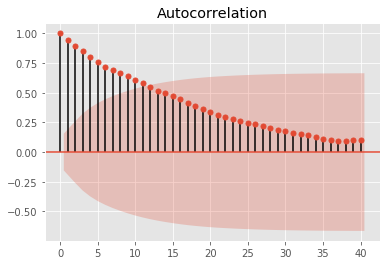

In [95]:
plot_acf(DGS10_Monthly['close'].values,lags=40)
plt.show()

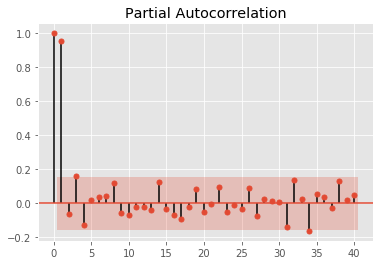

In [98]:
plot_pacf(DGS10_Monthly['close'].values,lags=40)
plt.show()

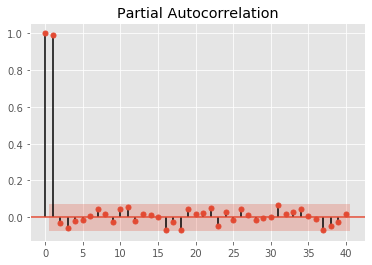

In [102]:
plot_pacf(DGS10_weekly['close'].values,lags=40)
plt.show()

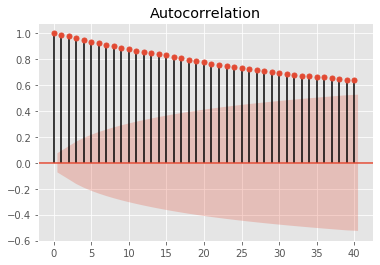

In [101]:
plot_acf(DGS10_weekly['close'].values,lags=40)
plt.show()

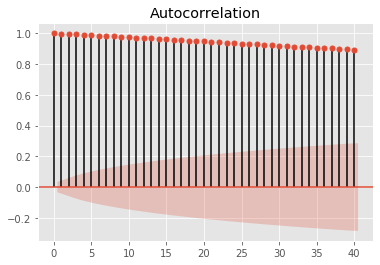

In [106]:
plot_acf(DGS10_daily.values,lags=40)
plt.show()

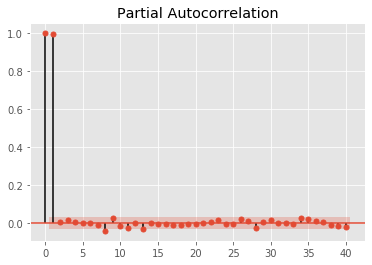

In [108]:
plot_pacf(DGS10_daily.values,lags=40)
plt.show()

# Conduct Augmented Dickey-Fuller Test for Unit Roots

In [109]:
from statsmodels.tsa.stattools import adfuller


Augmented Dickey-Fuller unit root test [documentation][https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html]

In [117]:
adfuller(DGS10_daily.values, maxlag=14, autolag=None)

(-2.125185341905271,
 0.23450876676828092,
 14,
 3341,
 {'1%': -3.4323087941815134,
  '5%': -2.8624054806561885,
  '10%': -2.5672307125909124})

In [122]:
adfuller(DGS10_weekly['close'], autolag='t-stat')

(-1.9183118259161356,
 0.32349628870159486,
 18,
 681,
 {'1%': -3.4399889432093325,
  '5%': -2.865793456189478,
  '10%': -2.5690350878361916},
 2.130149032744437)

In [124]:
adfuller(DGS10_weekly['close'], autolag='AIC')

(-1.9220753092102087,
 0.3217485048691322,
 0,
 699,
 {'1%': -3.439739809554328,
  '5%': -2.86568368980381,
  '10%': -2.5689766074363334},
 -828.3266010136422)

In [125]:
adfuller(DGS10_weekly['close'])

(-1.9220753092102087,
 0.3217485048691322,
 0,
 699,
 {'1%': -3.439739809554328,
  '5%': -2.86568368980381,
  '10%': -2.5689766074363334},
 -828.3266010136422)